In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import csv
import os
import seaborn as sns


In [39]:
with open('test.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data)

print(df.head())

                                                  me
0  [{'__typename': 'users', 'user_books': [{'__ty...


In [40]:
with open('structured_output.json', 'r') as file: 
    data = json.load(file)

books = data["books"]

csv_file_path = 'cleaned_tags_data.csv' 

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = [
        'id', 'title', 'author', 'genre', 'rating', 'releaseDate', 'pages', 'description', 'tags'
    ]
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for book in books:
        book_info = {
            'id': book['id'],
            'title': book['title'],
            'author': book['author'],
            'genre': book['genre'],
            'rating': book['rating'],
            'releaseDate': book['releaseDate'],
            'pages': book['pages'],
            'description': book['description']
        }
        
        tags = ', '.join([tag['tag'] for tag in book['tags']])
        
        book_info['tags'] = tags
        
        writer.writerow(book_info)

print(f"Cleaned books data has been successfully saved to {csv_file_path}.") 

Cleaned books data has been successfully saved to cleaned_tags_data.csv.


In [41]:
df = pd.read_csv('cleaned_tags_data.csv')

In [42]:
df

,id,title,author,genre,rating,releaseDate,pages,description,tags
0,42,Notes from Underground,Fyodor Dostoevsky,Fiction,4.083333,1847-01-01,149.0,Notes from Underground (pre-reform Russian: За...,"Fiction, Classics, History, Literary Fiction, ..."
1,53,The Rap Year Book: The Most Important Rap Song...,Shea Serrano,Unknown,4.312500,2015-10-13,583.0,"A New York Times–bestselling, in-depth explora...",NaN
2,59,Holding Up the Universe,Jennifer Niven,Young Adult,3.642857,2016-01-01,402.0,A New York Times Bestseller From the author of...,"Fiction, Young Adult, Romance, Mental health, ..."
3,80,Cell,Stephen King,Horror,3.397590,2006-01-01,496.0,Cell is a 2006 apocalyptic horror novel by Ame...,"Fantasy, Science fiction, Dystopian, Paranormal"
4,138,Dreams from My Father: A Story of Race and Inh...,Barack Obama,History,4.005618,1995-01-01,461.0,Before Barack Obama became a politician he was...,"History, Nonfiction, Biography, Biography & Au..."
...,...,...,...,...,...,...,...,...,...
5094,1684108,I Dated a Legal Devil,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN
5095,1692163,Let Me Claim You,Marina Simcoe,Unknown,4.000000,2024-07-21,222.0,"One minute, I’m taking out the trash in the al...",NaN
5096,1697265,Machines like Us: Toward AI with Common Sense,Ronald J. Brachman,Unknown,NaN,2022-01-01,320.0,How we can create artificial intelligence with...,NaN
5097,1708431,Barbie(TM): The World Tour,Margot Robbie,Unknown,NaN,2024-01-01,170.0,For the press tour following the record-breaki...,NaN


In [43]:
print(df['tags'])

0       Fiction, Classics, History, Literary Fiction, ...
1                                                     NaN
2       Fiction, Young Adult, Romance, Mental health, ...
3         Fantasy, Science fiction, Dystopian, Paranormal
4       History, Nonfiction, Biography, Biography & Au...
                              ...                        
5094                                                  NaN
5095                                                  NaN
5096                                                  NaN
5097                                                  NaN
5098                                                  NaN
Name: tags, Length: 5099, dtype: object


In [44]:
import pandas as pd

df = pd.read_csv('cleaned_tags_data.csv')

num_rows = len(df) 
num_rows = df.shape[0] 

print(f"Number of data entries in the CSV file: {num_rows}")

Number of data entries in the CSV file: 5099


In [45]:
df.head()

,id,title,author,genre,rating,releaseDate,pages,description,tags
0,42,Notes from Underground,Fyodor Dostoevsky,Fiction,4.083333,1847-01-01,149.0,Notes from Underground (pre-reform Russian: За...,"Fiction, Classics, History, Literary Fiction, ..."
1,53,The Rap Year Book: The Most Important Rap Song...,Shea Serrano,Unknown,4.312500,2015-10-13,583.0,"A New York Times–bestselling, in-depth explora...",NaN
2,59,Holding Up the Universe,Jennifer Niven,Young Adult,3.642857,2016-01-01,402.0,A New York Times Bestseller From the author of...,"Fiction, Young Adult, Romance, Mental health, ..."
3,80,Cell,Stephen King,Horror,3.397590,2006-01-01,496.0,Cell is a 2006 apocalyptic horror novel by Ame...,"Fantasy, Science fiction, Dystopian, Paranormal"
4,138,Dreams from My Father: A Story of Race and Inh...,Barack Obama,History,4.005618,1995-01-01,461.0,Before Barack Obama became a politician he was...,"History, Nonfiction, Biography, Biography & Au..."


In [46]:
df.shape


(5099, 9)

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5099 non-null   int64  
 1   title        5099 non-null   object 
 2   author       5099 non-null   object 
 3   genre        5099 non-null   object 
 4   rating       4887 non-null   float64
 5   releaseDate  4925 non-null   object 
 6   pages        4563 non-null   float64
 7   description  4385 non-null   object 
 8   tags         4393 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 358.6+ KB


In [48]:
df.dtypes


id               int64
title           object
author          object
genre           object
rating         float64
releaseDate     object
pages          float64
description     object
tags            object
dtype: object

In [49]:
df.describe()

,id,rating,pages
count,5.099000e+03,4887.000000,4563.000000
mean,4.766485e+05,3.894077,374.582731
std,3.056766e+05,0.418639,182.379204
min,4.200000e+01,0.777778,0.000000
25%,3.322270e+05,3.687141,272.000000
50%,4.325340e+05,3.924528,352.000000
75%,5.259575e+05,4.132676,448.000000
max,1.719614e+06,5.000000,1956.000000


In [50]:
df.describe(exclude=[np.number])


,title,author,genre,releaseDate,description,tags
count,5099,5099,5099,4925,4385,4393
unique,5066,2896,27,1543,4382,3172
top,The Tombs of Atuan,Stephen King,Fiction,2023-01-01,Dubliners is a collection of vignettes of Dubl...,Fiction
freq,2,56,2201,243,2,158


In [51]:
df.isnull().sum() 

id               0
title            0
author           0
genre            0
rating         212
releaseDate    174
pages          536
description    714
tags           706
dtype: int64

In [52]:
df.dropna(subset=['description'], inplace=True)

In [53]:
df.head()

,id,title,author,genre,rating,releaseDate,pages,description,tags
0,42,Notes from Underground,Fyodor Dostoevsky,Fiction,4.083333,1847-01-01,149.0,Notes from Underground (pre-reform Russian: За...,"Fiction, Classics, History, Literary Fiction, ..."
1,53,The Rap Year Book: The Most Important Rap Song...,Shea Serrano,Unknown,4.312500,2015-10-13,583.0,"A New York Times–bestselling, in-depth explora...",NaN
2,59,Holding Up the Universe,Jennifer Niven,Young Adult,3.642857,2016-01-01,402.0,A New York Times Bestseller From the author of...,"Fiction, Young Adult, Romance, Mental health, ..."
3,80,Cell,Stephen King,Horror,3.397590,2006-01-01,496.0,Cell is a 2006 apocalyptic horror novel by Ame...,"Fantasy, Science fiction, Dystopian, Paranormal"
4,138,Dreams from My Father: A Story of Race and Inh...,Barack Obama,History,4.005618,1995-01-01,461.0,Before Barack Obama became a politician he was...,"History, Nonfiction, Biography, Biography & Au..."


In [54]:
df.isnull().sum() 

id               0
title            0
author           0
genre            0
rating          77
releaseDate     35
pages          283
description      0
tags           338
dtype: int64

In [55]:
df.shape


(4385, 9)

In [56]:
df.dropna(subset=['rating'], inplace=True)

In [57]:
df.shape


(4308, 9)

In [58]:
df.isnull().sum() 

id               0
title            0
author           0
genre            0
rating           0
releaseDate     30
pages          277
description      0
tags           300
dtype: int64

In [59]:
df.drop(columns=['pages'], inplace=True)

In [60]:
df.drop(columns=['releaseDate'], inplace=True)

In [61]:
df.isnull().sum() 

id               0
title            0
author           0
genre            0
rating           0
description      0
tags           300
dtype: int64

In [62]:
df.shape

(4308, 7)

In [63]:
df

,id,title,author,genre,rating,description,tags
0,42,Notes from Underground,Fyodor Dostoevsky,Fiction,4.083333,Notes from Underground (pre-reform Russian: За...,"Fiction, Classics, History, Literary Fiction, ..."
1,53,The Rap Year Book: The Most Important Rap Song...,Shea Serrano,Unknown,4.312500,"A New York Times–bestselling, in-depth explora...",NaN
2,59,Holding Up the Universe,Jennifer Niven,Young Adult,3.642857,A New York Times Bestseller From the author of...,"Fiction, Young Adult, Romance, Mental health, ..."
3,80,Cell,Stephen King,Horror,3.397590,Cell is a 2006 apocalyptic horror novel by Ame...,"Fantasy, Science fiction, Dystopian, Paranormal"
4,138,Dreams from My Father: A Story of Race and Inh...,Barack Obama,History,4.005618,Before Barack Obama became a politician he was...,"History, Nonfiction, Biography, Biography & Au..."
...,...,...,...,...,...,...,...
5082,1654400,In the Belly of the Whale,Michael Flynn,Fiction,4.000000,In the Belly of the Whale is a gripping epic t...,"Fiction, Science fiction"
5090,1671500,Eleven Numbers,Lee Child,Unknown,3.500000,An American mathematician’s assignment in Russ...,NaN
5091,1675464,Tao te Ching,Lao Tzu,Unknown,4.500000,This unique edition of the Tao Te Ching featur...,NaN
5093,1680271,"Oh, The pets you can get!",Tish Rabe,Unknown,3.000000,The Cat and Co. take off to the faraway land o...,NaN


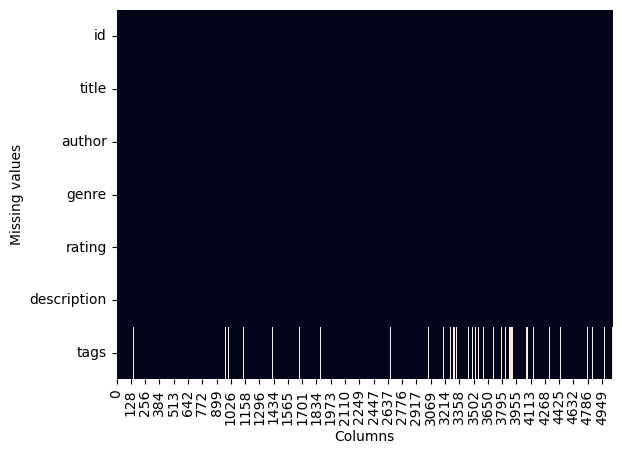

In [64]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [65]:
df["missing_description"] = np.where(df["description"].isna(), 1, 0)

In [66]:
df.head()

,id,title,author,genre,rating,description,tags,missing_description
0,42,Notes from Underground,Fyodor Dostoevsky,Fiction,4.083333,Notes from Underground (pre-reform Russian: За...,"Fiction, Classics, History, Literary Fiction, ...",0
1,53,The Rap Year Book: The Most Important Rap Song...,Shea Serrano,Unknown,4.312500,"A New York Times–bestselling, in-depth explora...",NaN,0
2,59,Holding Up the Universe,Jennifer Niven,Young Adult,3.642857,A New York Times Bestseller From the author of...,"Fiction, Young Adult, Romance, Mental health, ...",0
3,80,Cell,Stephen King,Horror,3.397590,Cell is a 2006 apocalyptic horror novel by Ame...,"Fantasy, Science fiction, Dystopian, Paranormal",0
4,138,Dreams from My Father: A Story of Race and Inh...,Barack Obama,History,4.005618,Before Barack Obama became a politician he was...,"History, Nonfiction, Biography, Biography & Au...",0


In [67]:
header_column = 'tags'

if header_column in df.columns:
    print(df[header_column])
else:
    print(f"Column '{header_column}' not found in the CSV file.")


0       Fiction, Classics, History, Literary Fiction, ...
1                                                     NaN
2       Fiction, Young Adult, Romance, Mental health, ...
3         Fantasy, Science fiction, Dystopian, Paranormal
4       History, Nonfiction, Biography, Biography & Au...
                              ...                        
5082                             Fiction, Science fiction
5090                                                  NaN
5091                                                  NaN
5093                                                  NaN
5095                                                  NaN
Name: tags, Length: 4308, dtype: object


In [68]:
if header_column in df.columns:
    unique_values = df[header_column].unique().tolist()
    print(f"Unique values in '{header_column}':")
    print(unique_values)
else:
    print(f"Column '{header_column}' not found in the CSV file.")

Unique values in 'tags':
['Fiction, Classics, History, Literary Fiction, Realistic Fiction, Philosophical', nan, 'Fiction, Young Adult, Romance, Mental health, Contemporary', 'Fantasy, Science fiction, Dystopian, Paranormal', 'History, Nonfiction, Biography, Biography & Autobiography, social science, African Americans', 'Fiction, Fantasy, Thriller, Police, Supernatural', 'Fiction, Mystery, Thriller, Murder, Crime', 'Fiction, Fantasy, Adventure, Science fiction, War', 'Fiction, Fantasy, Adventure, Science fiction, War, Magic', 'Fiction, Fantasy, Young Adult, Adventure, History, LGBTQ, Mystery, Juvenile Fiction, Young Adult Fiction, Murder', 'Fiction, Fantasy, Adventure, Classics, Science fiction, Comics, Dystopian, Comics & Graphic Novels, Graphic novels', 'Young Adult, Nonfiction, Biography, Biography & Autobiography, Juvenile Nonfiction, Women, Self-Help, autobiography', 'Fiction, Fantasy, Classics, Literature, Travel, Family, Domestic fiction, Magical Realism', 'History, War, Nonfict

In [69]:
if header_column in df.columns:
    unique_values = df[header_column].unique()
    unique_df = pd.DataFrame(unique_values, columns=[header_column])

    output_file = 'tropes.csv'
    unique_df.to_csv(output_file, index=False)
    print(f"Unique values saved to '{output_file}'.")
else:
    print(f"Column '{header_column}' not found in the CSV file.")


Unique values saved to 'tropes.csv'.


In [70]:
unique_tropes = set()
with open('tropes.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row: 
            tropes = row['tags'].split(', ')
            unique_tropes.update(tropes)
with open('tropes_refined.csv', 'w') as outfile:
    for trope in unique_tropes:
        outfile.write(f"{trope}\n")

print(f"Refined unique tropes saved to 'tropes_refined.csv'.")

Refined unique tropes saved to 'tropes_refined.csv'.


In [71]:
df = pd.read_csv('cleaned_tags_data.csv')
genre_tags = {}
for index, row in df.iterrows():
    genre = row['genre']
    tags = str(row['tags']).split(', ')
    if genre not in genre_tags:
        genre_tags[genre] = set()

    genre_tags[genre].update(tags)  

unique_genre_tags = [{'genre': genre, 'tags': ', '.join(tags)} for genre, tags in genre_tags.items()]
unique_genre_tags_df = pd.DataFrame(unique_genre_tags)

unique_genre_tags_df.to_csv('genre_tags.csv', index=False)
print("Unique genre tags have been successfully saved to 'unique_genre_tags.csv'.")

Unique genre tags have been successfully saved to 'unique_genre_tags.csv'.


In [72]:
df = pd.read_csv('updated_data.csv')
genre_tags = {}
for index, row in df.iterrows():
    genre = row['genre']
    tags = str(row['tags']).split(', ')
    if genre not in genre_tags:
        genre_tags[genre] = set()

    genre_tags[genre].update(tags)  

unique_genre_tags = [{'genre': genre, 'tags': ', '.join(tags)} for genre, tags in genre_tags.items()]
unique_genre_tags_df = pd.DataFrame(unique_genre_tags)

unique_genre_tags_df.to_csv('updated_genre_tags.csv', index=False)


In [73]:
# Load JSON data
with open('structured_output.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Function to remove specified tags from books of a certain genre
def remove_tags_by_genre(data, genre_to_filter, tags_to_remove):
    for book in data.get('books', []):  # Use .get() to avoid KeyError
        if book.get('genre') == genre_to_filter:  
            if 'tags' in book and isinstance(book['tags'], list):  
                book['tags'] = [tag for tag in book['tags'] if tag.get('tag') not in tags_to_remove]
    return data

# Define genres and tags to be removed
genre_tag_removals = {
    'Young Adult': ['Young Adult','Realistic Fiction','Australian fiction',' English','General','Blogs',"English",'Mathematics','nan',' 2001-','Boys','American','Food habits','Ability','Acculturation', 'Juvenile Fiction', 'Juvenile Nonfiction', 'Young Adult Nonfiction', 'Application software'],
    'Fiction' : ['Downloadable e-Books','Realistic Fiction',' English','Australian fiction','Mathematics','Ability','Charms','Children of alchoholics','Xanth (Imaginary place)','Gulls','Daye',' N.Y.)','Call','Monster Romance','D','Tokyo (Japan)','Creation (Literary',' Jewish (1939-1945)','Hole','Epistolary',' Resistance to','A','Babel','Geishas','Metaphysics','Canada','Etiquette','Defense information','Florence (Italy)','Bookbinding','Africa',' Thomas (Fictitious character)',' Thomas','Butlers','Indian Territory','Acquaintance rape','Foreign Language Study','Elias (Fictitious character)','Children of clergy','Cocktail servers','Boston (Mass.)','X-ology','Alera (Imaginary place)','Books and reading',' 1961-1975','Adult children of aging parents','Dublin (Ireland)','Caulfield','Weird fiction','Compact discs','Mississippi','Middle Earth (Imaginary place)','Smiley','General', ' Holden (Fictitious character)','Children of the rich','Arthurian romances','Apartment concierges','etc.)','Jalisco (Mexico)','Algeria','Juvenile Nonfiction','Ghana','Technology & Engineering','Creative ability in science','Electronic mail messages',' Edward (Fictitious character)',' 2001-','Amerikaanse fiksie','Information society','Carnival owners','sapphic','Cattle drives','Butterflies','Models (Persons)','Characters and characteristics in literature','Burma','Bereavement','Madison (Wis.)','Steampunk','Indians of North America','Space Opera','Downloadable e-Books',' Klaus (Fictitious character)','Anansi (Legendary character)','Discworld (Imaginary place)','reference','Cloning','Aventure and aventuriers','Blue (Fictitious character : Stiefvater)',' Elizabeth (Fictitious character)','Bildungsromans','Cities and towns','Documentary films','Castle Rock (Me. : Imaginary place)','Choice (Psychology)','Highlands (Scotland)',' 1485?-1540',' 1900-1945 - Texts','Data encryption (Computer science)','  Contests','Aircraft accident victims','Computer technicians','Glasgow (Scotland)','Domestic drama',' etc.)',' etc','Discoveries in geography',' Personal','Juvenile Fiction','Comedias cinematograficas','Railroad construction workers','Local author','Television plays','Blomkvist','N.Y.)','Baudelaire','Ringworld (Imaginary place)','Chicago (Ill.)','General fiction','Cullen',' Earl of Essex','Alabama',' 1945-','Blessing and cursing','Apartment houses','Circumstellar matter','Alanna (Fictitious character)','Dating (Social customs)','Breast','Fugitives from justice','slasher','Nonfiction','English fiction','Accident victims',' 1939-1945',' October (Fictitious character)',' Jim (Fictitious character)','Barges','Electronic books','Toronto','Alternative histories (Fiction)',' George (Fictitious character)','Androids'],
    'Horror' : ['Horror','Realistic Fiction','Horror fiction','Juvenile Fiction','English fiction','American','American Fiction','General'],
    'History': ['Ireland','Chicago (Ill.)','Salt','General','Eugenics','Nan-ching shih (China)','Nanjing (Jiangsu Sheng','Imperial Trans-Antarctic Expedition'],
    'Fantasy':['Juvenile Nonfiction','Realistic Fiction','Juvenile Fiction','Australian fiction','Polish language materials',' Chicago (Ill.)','Foreign Language Study','Discworld (Imaginary place)','False personation',' Electronic books','Dresden','Canada','Earthquake zones',' fantas','General','Internet','litrpg','Bards and bardism','Read 2023','etc','Diana (Fictitious character)','Grimdark','Characters and characteristics in literature',' Belacqua','American fiction','apologetics','Lyra (Fictitious character)','English fiction','Nonfiction','Xianxia','Books and reading',' Australian fiction',' low fantasy'],
    'Mystery':['Juvenile Nonfiction','Realistic Fiction','Poirot','Mexico','English fiction',' English','Juvenile Fiction','General','Jane (Fictitious character)','Hercule (Fictitious character)','British','Australian fiction'],
    'Nonfiction':['General',' reference','White people','Reclame'],
    'Classics':['etc.)','Realistic Fiction','General','Denken','reference','Creation (Literary'],
    'Science Fiction':['Juvenile Nonfiction',' Juvenile Fiction','General','Science fiction',' Jim (Fictitious character)','Juvenile Fiction',' strips'],
    'Action & Adventure':['Bourne','Fiction','Jason (Fictitious character)','Arches National Park (Utah)','Juvenile Fiction','Realistic Fiction'],
    'Comics':['Juvenile Fiction','House cleaning','Home economics'],
    'Self-Help':['Fiction'],
    'Science':['Juvenile Nonfiction','Juvenile Fiction','General','Science fiction'],
    'Biography & Autobiography':['Gilmore Girls (Television program)'],
    'LGBTQ':['Amherst (Mass.)','Realistic Fiction'],
    'Romance':['Juvenile Fiction','Realistic Fiction']
}
# Apply filtering for each genre
for genre, tags_to_remove in genre_tag_removals.items():
    data = remove_tags_by_genre(data, genre, tags_to_remove)

# Save updated JSON
with open('books_data_updated.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, indent=4)

print("Tags removed successfully!")

Tags removed successfully!


In [74]:
csv_file_path = 'updated_data.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['id', 'title', 'author', 'genre', 'rating', 'releaseDate', 'pages', 'description', 'tags']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for book in data.get('books', []):
        book_info = {
            'id': book.get('id', ''),
            'title': book.get('title', ''),
            'author': book.get('author', ''),
            'genre': book.get('genre', ''),
            'rating': book.get('rating', ''),
            'releaseDate': book.get('releaseDate', ''),
            'pages': book.get('pages', ''),
            'description': book.get('description', '')
        }
        
        tags = ', '.join([tag['tag'] for tag in book.get('tags', []) if isinstance(tag, dict)])
        book_info['tags'] = tags

        writer.writerow(book_info)

print(f"Cleaned books data has been successfully saved to {csv_file_path}.")

# Load CSV for tag aggregation
df = pd.read_csv(csv_file_path)

# Aggregate unique tags for each genre
genre_tags = {}
for _, row in df.iterrows():
    genre = row['genre']
    tags = str(row['tags']).split(', ')
    if genre not in genre_tags:
        genre_tags[genre] = set()
    genre_tags[genre].update(tags)

# Convert to DataFrame and save to CSV
unique_genre_tags_df = pd.DataFrame([
    {'genre': genre, 'tags': ', '.join(tags)} for genre, tags in genre_tags.items()
])

unique_genre_tags_df.to_csv('updated_genre_tags.csv', index=False, encoding='utf-8')

print("Unique genre tags have been saved to updated_genre_tags.csv.")

Cleaned books data has been successfully saved to updated_data.csv.
Unique genre tags have been saved to updated_genre_tags.csv.
